In [1]:
from platform import python_version

print(python_version())

3.11.9


In [2]:
%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-install-aq_87mr8/qc-grader_8ac7208985eb4123b1347b7d823db305
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-install-aq_87mr8/qc-grader_8ac7208985eb4123b1347b7d823db305
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 1d7a6915623b0cfeac4c114391c279e9d98eb7f9
  Preparing metadata (setup.py) ... done
  Using cached qiskit-2.1.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached qiskit_serverless-0.25.1-py3-none-any.whl.metadata (5.4 kB)
  Using cached ray-2.48.0-cp311-cp311-manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached cloudpickle-2.2.1-py3-none-any.whl.metadata (6.9 kB)
  Using cached opentelemetry_api-1.33.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached opentelemetry_sdk-1.33.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached opente

In [3]:
import qiskit
import qc_grader

print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.1
Grader version: 0.22.12


In [4]:
# Save your API key to track your progress and have access to the quantum computers

your_api_key = "DjTnuOBu5ndOmdKtTjWsQpSN-sI1j758HDniyAJCJyi6"
your_crn = "crn:v1:bluemix:public:quantum-computing:us-east:a/0b5933f426c04340bf9bf86cdb5ba7b1:5ae2b2ad-878c-4686-921b-8f35c6387371::"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="qgss-2025",
    overwrite=True
)

In [5]:
# Check that the account has been saved properly
service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'DjTnuOBu5ndOmdKtTjWsQpSN-sI1j758HDniyAJCJyi6',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/0b5933f426c04340bf9bf86cdb5ba7b1:5ae2b2ad-878c-4686-921b-8f35c6387371::',
  'verify': True,
  'private_endpoint': False}}

In [6]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

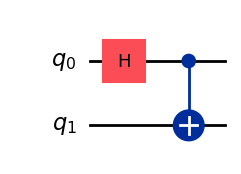

In [7]:
# Create a new circuit with a single qubit
qc = QuantumCircuit(2)
# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubit 1
qc.cx(0, 1)
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

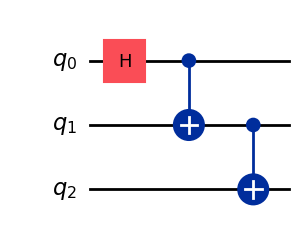

In [8]:
from qiskit import QuantumCircuit

# Create a new circuit with three qubits
qc = QuantumCircuit(3)

### WRITE YOUR CODE BELOW HERE ###
# Add a H gate to qubit 0
qc.h(0)

# Add a CNOT gate to qubits 0 and 1 (control=0, target=1)
qc.cx(0, 1)

# Add a CNOT gate to qubits 1 and 2 (control=1, target=2)
qc.cx(1, 2)
### YOUR CODE FINISHES HERE    ###

# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")


In [9]:
# Submit your answer using following code
grade_lab0_ex1(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


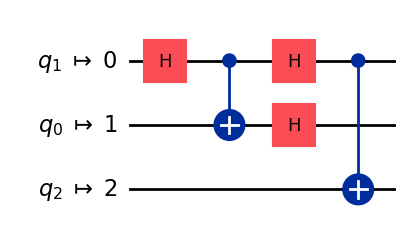

In [10]:
### WRITE YOUR CODE BELOW HERE ###
# Write the coupling map of connections between qubits 0 and 1 and 0 and 2 as a list of pairs: [[0,1],...]
coupling_map = [[0, 1], [0, 2]]

# Transpile the quantum circuit `qc` using the `generate_preset_pass_manager` function and the `coupling_map` list
pm = generate_preset_pass_manager(coupling_map=coupling_map)
### YOUR CODE FINISHES HERE    ###
qc_transpiled = pm.run(qc)

qc_transpiled.draw("mpl")# Submit your answer using following code


In [11]:
# Submit your answer using following code
grade_lab0_ex2(qc_transpiled)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [12]:
# Add measurement operations
qc.measure_all()

# Set up the backend
backend = AerSimulator()

# Set up the sampler
sampler = Sampler(mode=backend)

# Submit the circuit to Sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

# Get the results
results_sampler = job.result()

In [13]:
# Set up the Estimator
estimator = Estimator(mode=backend)

# Define some observables
ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

# Submit the circuit to Estimator
pub = (qc, observables)
job = estimator.run(pubs=[pub])

# Get the results
results_estimator = job.result()

  Outcomes : {'000': 518, '111': 506}


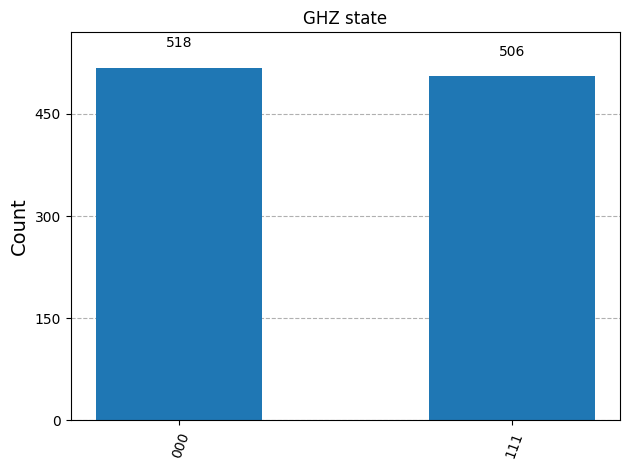

In [14]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Expectation values: [('ZZZ', np.float64(0.0234375)), ('ZZX', np.float64(0.0009765625)), ('ZII', np.float64(0.0)), ('XXI', np.float64(-0.017578125)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


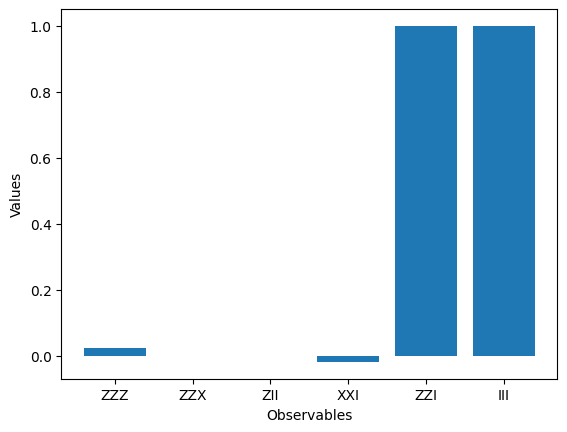

In [15]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

# Set up our plot
container = plt.bar(observables_list, exp_values, width=0.8)
# Label each axis
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

In [16]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 2443 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 1998 participants have completed this lab
Lab 2: 7/7 exercises completed (100%)
    ✅ 1289 participants have completed this lab
Lab 3: 5/5 exercises completed (100%)
    ✅ 1110 participants have completed this lab
Lab 4: 4/6 exercises completed (67%)
    ✅ 1015 participants have completed this lab
Functions Labs: 0/8 exercises completed (0%)
    ✅ 5 participants have completed this lab
